# Current Algorithm

Junita Sirait

In [7]:
import json
import csv
import pandas as pd
import numpy as np
import statistics

import tldextract

from collections import Counter, defaultdict
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler

from sklearn import preprocessing

from sklearn.metrics import silhouette_score
from sklearn import metrics
from kneed import KneeLocator

from scipy.interpolate import make_interp_spline, BSpline

from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD

import math

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import VarianceThreshold

import os

<a id="sub1"></a>
## Subreddit data

In [8]:
pd1 = os.path.split(os.getcwd())[0]
data_fp = os.path.join(pd1,"data/gm-newssources-subreddits")
dfp = os.path.join(pd1,"data")
mbfc_path = os.path.join(pd1, "data/mbfc")

In [9]:
with open (os.path.join(dfp,"gm_intersection.json"), "r", encoding = "utf-8") as infile:
    gm_intersection = json.load(infile)

In [10]:
len(gm_intersection)

42477

In [11]:
# Reading in all the subreddits in our files

with open(os.path.join(data_fp,"subreddit_ns_2021-01.json"), "r", encoding = "utf-8") as infile1a:
    subreddit_ns_jan = json.load(infile1a)

with open(os.path.join(data_fp,"subreddit_ns_2021-02.json"), "r", encoding = "utf-8") as infile2a:
    subreddit_ns_feb = json.load(infile2a)
    
with open(os.path.join(data_fp,"subreddit_ns_2021-03.json"), "r", encoding = "utf-8") as infile3a:
    subreddit_ns_march = json.load(infile3a)
    
with open(os.path.join(data_fp,"subreddit_ns_2021-04.json"), "r", encoding = "utf-8") as infile4a:
    subreddit_ns_april = json.load(infile4a)
    
with open(os.path.join(data_fp,"subreddit_ns_2021-05.json"), "r", encoding = "utf-8") as infile5a:
    subreddit_ns_may = json.load(infile5a)
    
with open(os.path.join(data_fp,"subreddit_ns_2021-06.json"), "r", encoding = "utf-8") as infile6a:
    subreddit_ns_jun = json.load(infile6a)

In [12]:
# ns_subreddit
with open(os.path.join(data_fp,"ns_subreddit_2021-01.json")) as infile1:
    ns_subreddit_01 = json.load(infile1)
    
with open(os.path.join(data_fp,"ns_subreddit_2021-02.json")) as infile2:
    ns_subreddit_02 = json.load(infile2)
    
with open(os.path.join(data_fp,"ns_subreddit_2021-03.json")) as infile3:
    ns_subreddit_03 = json.load(infile3)
    
with open(os.path.join(data_fp,"ns_subreddit_2021-04.json")) as infile4:
    ns_subreddit_04 = json.load(infile4)
    
with open(os.path.join(data_fp,"ns_subreddit_2021-05.json")) as infile5:
    ns_subreddit_05 = json.load(infile5)
    
with open(os.path.join(data_fp,"ns_subreddit_2021-06.json")) as infile6:
    ns_subreddit_06 = json.load(infile6)

In [13]:
files_sub = [subreddit_ns_jan, subreddit_ns_feb, subreddit_ns_march, subreddit_ns_april, subreddit_ns_may, subreddit_ns_jun]
files_ns = [ns_subreddit_01, ns_subreddit_02, ns_subreddit_03, ns_subreddit_04, ns_subreddit_05, ns_subreddit_06]

In [14]:
sr_union_old = (set(subreddit_ns_jan) | set(subreddit_ns_feb) |
      set(subreddit_ns_march) | set(subreddit_ns_april) |
      set(subreddit_ns_may) | set(subreddit_ns_jun))

In [15]:
len(sr_union_old)

1619721

## Removing `u_`s

In [16]:
u_s = [s for s in sr_union_old if s.startswith("u_")]
len(u_s)

910554

In [17]:
u_s[:5]

['u_cuongbmt',
 'u_blondesaredumb10',
 'u_Amber_342',
 'u_RoseburgOR',
 'u_dante_from_bayonetta']

In [18]:
for f in files_sub:
    [f.pop(u) for u in u_s if u in f]

In [19]:
sr_union_old = (set(subreddit_ns_jan) | set(subreddit_ns_feb) |
      set(subreddit_ns_march) | set(subreddit_ns_april) |
      set(subreddit_ns_may) | set(subreddit_ns_jun))
len(sr_union_old)

709167

Removing "reddit.com" and non_news from files_sub

In [20]:
non_news = []
with open("non_news.csv", "r", encoding="utf-8") as nn:
    r = csv.reader(nn, delimiter=",")
    counter = 0
    for row in r:
        if counter != 0:
            non_news.append(row[0])
        counter += 1
len(non_news)

130

In [21]:
for f in files_sub:
    for n in f:
        if 'reddit.com' in f[n]: f[n].pop('reddit.com')
        # removing each of the non_news
        for nns in non_news:
            if nns in f[n]: f[n].pop(nns)
    print("Done for a file")

Done for a file
Done for a file
Done for a file
Done for a file
Done for a file
Done for a file


Now that we have removed non_news from various subreddits, there would be subreddits that now does not have anything inside. Let's get rid of these subreddits as well.

In [22]:
files_sub = [subreddit_ns_jan, subreddit_ns_feb, subreddit_ns_march, subreddit_ns_april, subreddit_ns_may, subreddit_ns_jun]
files_ns = [ns_subreddit_01, ns_subreddit_02, ns_subreddit_03, ns_subreddit_04, ns_subreddit_05, ns_subreddit_06]

In [23]:
for s in files_sub:
    empty_subs = set()
    for k in s:
        if len(s[k]) == 0: empty_subs.add(k)
    print(len(empty_subs))
    [s.pop(u) for u in empty_subs]
    print("done for a file")

183592
done for a file
184349
done for a file
203649
done for a file
210354
done for a file
247206
done for a file
263501
done for a file


In [24]:
for f in files_sub:
    [f.pop(u) for u in empty_subs if u in f]
    print("done for a file")

done for a file
done for a file
done for a file
done for a file
done for a file
done for a file


Instead of removing from files_ns, I will reconstruct files_ns from files_sub.

In [25]:
def ns_from_sub(subfile):
    d = defaultdict(dict)
    for sub in subfile:
        for n in subfile[sub]:
            d[n][sub] = subfile[sub][n]
    return d

In [26]:
ns_subreddit_01 = ns_from_sub(subreddit_ns_jan)
ns_subreddit_02 = ns_from_sub(subreddit_ns_feb)
ns_subreddit_03 = ns_from_sub(subreddit_ns_march)
ns_subreddit_04 = ns_from_sub(subreddit_ns_april)
ns_subreddit_05 = ns_from_sub(subreddit_ns_may)
ns_subreddit_06 = ns_from_sub(subreddit_ns_jun)

In [27]:
"reddit.com" in ns_subreddit_01

False

Let's use the intersection in an alphabetical order as a fixed order of our subreddits.

In [28]:
subs = sorted(set(subreddit_ns_jan) & set(subreddit_ns_feb) &
      set(subreddit_ns_march) & set(subreddit_ns_april) &
      set(subreddit_ns_may) & set(subreddit_ns_jun))

In [29]:
len(subs)

10194

## Intersections and unions of subreddits

In [30]:
# what about their intersection?
sr_intersection = (
      set(subreddit_ns_jan) & set(subreddit_ns_feb) &
      set(subreddit_ns_march) & set(subreddit_ns_april) &
      set(subreddit_ns_may) & set(subreddit_ns_jun))

print("intersection:", len(sr_intersection))

intersection: 10194


In [31]:
sr_union = (
      set(subreddit_ns_jan) | set(subreddit_ns_feb) |
      set(subreddit_ns_march) | set(subreddit_ns_april) |
      set(subreddit_ns_may) | set(subreddit_ns_jun))

print("union:", len(sr_union))

union: 43800


<a id="sub2"></a>
## News sources data

How many news sources are there?

In [32]:
# union
ns_union = (set(ns_subreddit_01) |
       set(ns_subreddit_02) |
       set(ns_subreddit_03) |
       set(ns_subreddit_04) |
       set(ns_subreddit_05) |
       set(ns_subreddit_06))

len(ns_union)

23426

In [33]:
nss = (set(ns_subreddit_01) &
       set(ns_subreddit_02) &
       set(ns_subreddit_03) &
       set(ns_subreddit_04) &
       set(ns_subreddit_05) &
       set(ns_subreddit_06))

In [34]:
num_ns = len(nss)
num_ns

8667

In [35]:
"u_toronto_news" in subreddit_ns_jan

False

In [36]:
len(subreddit_ns_jan)

19069

## For each news source, let's count in how many subreddits they appear

In [37]:
subreddit_count = dict()
for ns in ns_union:
    subreddit_count[ns] = len(set(ns_subreddit_01.get(ns, dict()).keys()) 
                               | set(ns_subreddit_02.get(ns, dict()).keys()) 
                               | set(ns_subreddit_03.get(ns, dict()).keys()) 
                               | set(ns_subreddit_04.get(ns, dict()).keys())
                               | set(ns_subreddit_05.get(ns, dict()).keys()) 
                               | set(ns_subreddit_06.get(ns, dict()).keys()))

`subreddit_count` stores in how many subreddits each news source appears.

In [38]:
subreddit_count['nytimes.com']

5451

In [39]:
subreddit_count_freq = dict(Counter(subreddit_count.values()).most_common())
subreddit_count_freq

{1: 4711,
 2: 2784,
 3: 1951,
 4: 1383,
 5: 1113,
 6: 911,
 7: 772,
 8: 652,
 9: 511,
 10: 475,
 11: 428,
 12: 374,
 13: 345,
 14: 318,
 15: 297,
 16: 255,
 17: 245,
 18: 215,
 19: 189,
 21: 189,
 20: 177,
 22: 171,
 24: 148,
 27: 130,
 25: 129,
 23: 124,
 28: 111,
 30: 107,
 33: 101,
 26: 97,
 29: 97,
 32: 93,
 37: 88,
 35: 83,
 31: 82,
 34: 74,
 46: 72,
 36: 72,
 44: 66,
 40: 66,
 41: 64,
 43: 64,
 38: 62,
 42: 61,
 39: 58,
 45: 57,
 49: 54,
 48: 50,
 53: 49,
 47: 49,
 56: 44,
 51: 44,
 55: 44,
 54: 42,
 50: 42,
 67: 41,
 52: 41,
 73: 41,
 60: 34,
 68: 33,
 63: 31,
 58: 31,
 57: 30,
 62: 30,
 80: 27,
 59: 27,
 61: 27,
 64: 27,
 66: 26,
 84: 26,
 75: 26,
 71: 25,
 83: 25,
 65: 25,
 70: 24,
 86: 23,
 72: 23,
 69: 23,
 89: 22,
 79: 21,
 85: 21,
 81: 21,
 92: 21,
 74: 21,
 90: 19,
 82: 19,
 110: 19,
 87: 19,
 109: 18,
 76: 18,
 98: 17,
 100: 17,
 78: 17,
 102: 16,
 96: 16,
 91: 15,
 77: 15,
 106: 15,
 121: 15,
 111: 14,
 103: 14,
 116: 14,
 104: 14,
 101: 13,
 133: 13,
 144: 13,
 99: 13,

`subreddit_count_freq` keeps track of how many news sources appear in *n* subreddits for all possible *n*.

In [40]:
max(subreddit_count_freq.keys())

5626

In [41]:
sde_ranked = Counter(subreddit_count).most_common()

for t in sde_ranked[:20]:
    sr, co = t
    if co > 1:
        print(f"{sr} is mentioned in {co} subreddits.")

theguardian.com is mentioned in 5626 subreddits.
nytimes.com is mentioned in 5451 subreddits.
cnn.com is mentioned in 5014 subreddits.
bbc.com is mentioned in 4246 subreddits.
reuters.com is mentioned in 3907 subreddits.
washingtonpost.com is mentioned in 3695 subreddits.
forbes.com is mentioned in 3494 subreddits.
cnbc.com is mentioned in 3361 subreddits.
bloomberg.com is mentioned in 3270 subreddits.
apnews.com is mentioned in 3085 subreddits.
businessinsider.com is mentioned in 3034 subreddits.
fandom.com is mentioned in 2983 subreddits.
bbc.co.uk is mentioned in 2976 subreddits.
npr.org is mentioned in 2910 subreddits.
nbcnews.com is mentioned in 2819 subreddits.
independent.co.uk is mentioned in 2730 subreddits.
msn.com is mentioned in 2702 subreddits.
dailymail.co.uk is mentioned in 2701 subreddits.
vice.com is mentioned in 2587 subreddits.
nypost.com is mentioned in 2445 subreddits.


In [42]:
sum(subreddit_count_freq.values()) == len(ns_union)

True

In [43]:
import itertools

In [44]:
scf = list(itertools.chain.from_iterable(itertools.repeat(k,v) for k,v in subreddit_count_freq.items()))

Text(0.5, 1.0, 'number of news sources appearing in x subreddits')

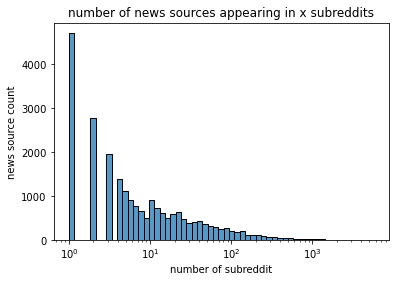

In [45]:
# sns.histplot([math.log(s,10) for s in scf])
sns.histplot(scf, log_scale=True)
plt.xlabel("number of subreddit")
plt.ylabel("news source count")
plt.title("number of news sources appearing in x subreddits")

How many news sources only appear in 10 subreddits or less? what about 9 or 8?

In [46]:
def pct_ns_in_k_subreddits(ks):
    ns_in_i_subreddit = [k for k in subreddit_count if subreddit_count[k] <= ks]
    count = len(ns_in_i_subreddit)
    print("There are {} news sources appearing in only {} subreddits or less ({}%)".format(count, ks, count/len(ns_union)))
    return count/len(ns_union)

In [47]:
pct_ns_in_k_subreddits(5)

There are 11942 news sources appearing in only 5 subreddits or less (0.5097754631605907%)


0.5097754631605907

In [48]:
0.15*len(ns_union)

3513.9

In [49]:
pct_in_k_subreddits = [(i, pct_ns_in_k_subreddits(i)) for i in range(1000)]

There are 0 news sources appearing in only 0 subreddits or less (0.0%)
There are 4711 news sources appearing in only 1 subreddits or less (0.2011013403910185%)
There are 7495 news sources appearing in only 2 subreddits or less (0.31994365235208744%)
There are 9446 news sources appearing in only 3 subreddits or less (0.4032271834713566%)
There are 10829 news sources appearing in only 4 subreddits or less (0.46226415094339623%)
There are 11942 news sources appearing in only 5 subreddits or less (0.5097754631605907%)
There are 12853 news sources appearing in only 6 subreddits or less (0.5486638777426791%)
There are 13625 news sources appearing in only 7 subreddits or less (0.5816187142491249%)
There are 14277 news sources appearing in only 8 subreddits or less (0.609451037308973%)
There are 14788 news sources appearing in only 9 subreddits or less (0.6312644070690686%)
There are 15263 news sources appearing in only 10 subreddits or less (0.6515410227951849%)
There are 15691 news sources a

There are 21964 news sources appearing in only 96 subreddits or less (0.9375907111756169%)
There are 21975 news sources appearing in only 97 subreddits or less (0.9380602749082216%)
There are 21992 news sources appearing in only 98 subreddits or less (0.9387859643131563%)
There are 22005 news sources appearing in only 99 subreddits or less (0.9393409032698711%)
There are 22022 news sources appearing in only 100 subreddits or less (0.9400665926748057%)
There are 22035 news sources appearing in only 101 subreddits or less (0.9406215316315205%)
There are 22051 news sources appearing in only 102 subreddits or less (0.9413045334244002%)
There are 22065 news sources appearing in only 103 subreddits or less (0.94190215999317%)
There are 22079 news sources appearing in only 104 subreddits or less (0.9424997865619398%)
There are 22090 news sources appearing in only 105 subreddits or less (0.9429693502945445%)
There are 22105 news sources appearing in only 106 subreddits or less (0.9436096644753

There are 22789 news sources appearing in only 203 subreddits or less (0.9728079911209767%)
There are 22795 news sources appearing in only 204 subreddits or less (0.9730641167933066%)
There are 22798 news sources appearing in only 205 subreddits or less (0.9731921796294716%)
There are 22801 news sources appearing in only 206 subreddits or less (0.9733202424656364%)
There are 22803 news sources appearing in only 207 subreddits or less (0.9734056176897464%)
There are 22807 news sources appearing in only 208 subreddits or less (0.9735763681379663%)
There are 22810 news sources appearing in only 209 subreddits or less (0.9737044309741313%)
There are 22813 news sources appearing in only 210 subreddits or less (0.9738324938102962%)
There are 22818 news sources appearing in only 211 subreddits or less (0.9740459318705712%)
There are 22822 news sources appearing in only 212 subreddits or less (0.9742166823187911%)
There are 22826 news sources appearing in only 213 subreddits or less (0.9743874

There are 23041 news sources appearing in only 305 subreddits or less (0.983565269358832%)
There are 23043 news sources appearing in only 306 subreddits or less (0.983650644582942%)
There are 23044 news sources appearing in only 307 subreddits or less (0.983693332194997%)
There are 23045 news sources appearing in only 308 subreddits or less (0.9837360198070519%)
There are 23047 news sources appearing in only 309 subreddits or less (0.983821395031162%)
There are 23047 news sources appearing in only 310 subreddits or less (0.983821395031162%)
There are 23048 news sources appearing in only 311 subreddits or less (0.9838640826432169%)
There are 23049 news sources appearing in only 312 subreddits or less (0.983906770255272%)
There are 23051 news sources appearing in only 313 subreddits or less (0.9839921454793819%)
There are 23053 news sources appearing in only 314 subreddits or less (0.9840775207034919%)
There are 23054 news sources appearing in only 315 subreddits or less (0.9841202083155

There are 23134 news sources appearing in only 394 subreddits or less (0.9875352172799453%)
There are 23136 news sources appearing in only 395 subreddits or less (0.9876205925040553%)
There are 23137 news sources appearing in only 396 subreddits or less (0.9876632801161103%)
There are 23137 news sources appearing in only 397 subreddits or less (0.9876632801161103%)
There are 23137 news sources appearing in only 398 subreddits or less (0.9876632801161103%)
There are 23138 news sources appearing in only 399 subreddits or less (0.9877059677281653%)
There are 23139 news sources appearing in only 400 subreddits or less (0.9877486553402203%)
There are 23139 news sources appearing in only 401 subreddits or less (0.9877486553402203%)
There are 23141 news sources appearing in only 402 subreddits or less (0.9878340305643303%)
There are 23141 news sources appearing in only 403 subreddits or less (0.9878340305643303%)
There are 23143 news sources appearing in only 404 subreddits or less (0.9879194

There are 23209 news sources appearing in only 494 subreddits or less (0.990736788184069%)
There are 23209 news sources appearing in only 495 subreddits or less (0.990736788184069%)
There are 23210 news sources appearing in only 496 subreddits or less (0.9907794757961239%)
There are 23211 news sources appearing in only 497 subreddits or less (0.990822163408179%)
There are 23212 news sources appearing in only 498 subreddits or less (0.9908648510202339%)
There are 23213 news sources appearing in only 499 subreddits or less (0.9909075386322889%)
There are 23214 news sources appearing in only 500 subreddits or less (0.9909502262443439%)
There are 23214 news sources appearing in only 501 subreddits or less (0.9909502262443439%)
There are 23214 news sources appearing in only 502 subreddits or less (0.9909502262443439%)
There are 23215 news sources appearing in only 503 subreddits or less (0.9909929138563989%)
There are 23216 news sources appearing in only 504 subreddits or less (0.9910356014

There are 23265 news sources appearing in only 608 subreddits or less (0.9931272944591479%)
There are 23266 news sources appearing in only 609 subreddits or less (0.9931699820712029%)
There are 23267 news sources appearing in only 610 subreddits or less (0.9932126696832579%)
There are 23268 news sources appearing in only 611 subreddits or less (0.9932553572953129%)
There are 23268 news sources appearing in only 612 subreddits or less (0.9932553572953129%)
There are 23268 news sources appearing in only 613 subreddits or less (0.9932553572953129%)
There are 23269 news sources appearing in only 614 subreddits or less (0.9932980449073678%)
There are 23269 news sources appearing in only 615 subreddits or less (0.9932980449073678%)
There are 23270 news sources appearing in only 616 subreddits or less (0.9933407325194229%)
There are 23272 news sources appearing in only 617 subreddits or less (0.9934261077435328%)
There are 23273 news sources appearing in only 618 subreddits or less (0.9934687

There are 23296 news sources appearing in only 707 subreddits or less (0.9944506104328524%)
There are 23296 news sources appearing in only 708 subreddits or less (0.9944506104328524%)
There are 23296 news sources appearing in only 709 subreddits or less (0.9944506104328524%)
There are 23296 news sources appearing in only 710 subreddits or less (0.9944506104328524%)
There are 23296 news sources appearing in only 711 subreddits or less (0.9944506104328524%)
There are 23296 news sources appearing in only 712 subreddits or less (0.9944506104328524%)
There are 23296 news sources appearing in only 713 subreddits or less (0.9944506104328524%)
There are 23297 news sources appearing in only 714 subreddits or less (0.9944932980449074%)
There are 23297 news sources appearing in only 715 subreddits or less (0.9944932980449074%)
There are 23297 news sources appearing in only 716 subreddits or less (0.9944932980449074%)
There are 23297 news sources appearing in only 717 subreddits or less (0.9944932

There are 23320 news sources appearing in only 801 subreddits or less (0.995475113122172%)
There are 23320 news sources appearing in only 802 subreddits or less (0.995475113122172%)
There are 23321 news sources appearing in only 803 subreddits or less (0.9955178007342269%)
There are 23321 news sources appearing in only 804 subreddits or less (0.9955178007342269%)
There are 23321 news sources appearing in only 805 subreddits or less (0.9955178007342269%)
There are 23321 news sources appearing in only 806 subreddits or less (0.9955178007342269%)
There are 23321 news sources appearing in only 807 subreddits or less (0.9955178007342269%)
There are 23321 news sources appearing in only 808 subreddits or less (0.9955178007342269%)
There are 23321 news sources appearing in only 809 subreddits or less (0.9955178007342269%)
There are 23321 news sources appearing in only 810 subreddits or less (0.9955178007342269%)
There are 23321 news sources appearing in only 811 subreddits or less (0.995517800

There are 23341 news sources appearing in only 909 subreddits or less (0.9963715529753265%)
There are 23342 news sources appearing in only 910 subreddits or less (0.9964142405873816%)
There are 23342 news sources appearing in only 911 subreddits or less (0.9964142405873816%)
There are 23342 news sources appearing in only 912 subreddits or less (0.9964142405873816%)
There are 23342 news sources appearing in only 913 subreddits or less (0.9964142405873816%)
There are 23343 news sources appearing in only 914 subreddits or less (0.9964569281994365%)
There are 23343 news sources appearing in only 915 subreddits or less (0.9964569281994365%)
There are 23343 news sources appearing in only 916 subreddits or less (0.9964569281994365%)
There are 23343 news sources appearing in only 917 subreddits or less (0.9964569281994365%)
There are 23344 news sources appearing in only 918 subreddits or less (0.9964996158114915%)
There are 23344 news sources appearing in only 919 subreddits or less (0.9964996

[(0.0, 200.0)]

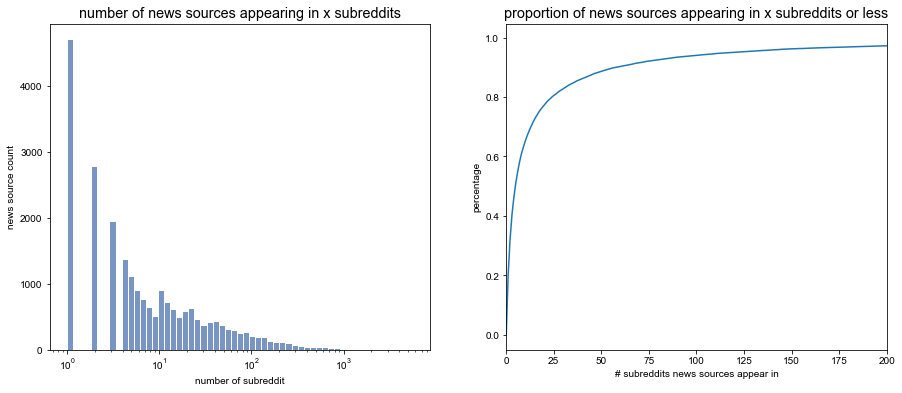

In [50]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))
sns.set(font_scale = 1.2)

sns.histplot(scf, log_scale=True, ax=ax1)
ax1.set_xlabel("number of subreddit")
ax1.set_ylabel("news source count")
ax1.set_title("number of news sources appearing in x subreddits")

sns.lineplot(x=[k[0] for k in pct_in_k_subreddits],
             y=[k[1] for k in pct_in_k_subreddits],
            ax=ax2)
ax2.set_ylabel("percentage")
ax2.set_xlabel("# subreddits news sources appear in")
ax2.set_title("proportion of news sources appearing in x subreddits or less")
ax2.set(xlim = (0, 200))

In [51]:
# mean
statistics.mean(scf)

31.897037479723384

In [52]:
# median
statistics.median(scf)

5.0

## For each news source let's count how many times they are shared regardless of in which subreddits

In [53]:
sum(dict().values())

0

In [54]:
def get_mention_count(ns):
    """get total mention count of ns in all six months"""
    count = 0
    files = [ns_subreddit_01, ns_subreddit_02, ns_subreddit_03, ns_subreddit_04, ns_subreddit_05, ns_subreddit_06]
    for f in files:
        ns_dict = f.get(ns, dict())
        if len(ns_dict) > 0:
            mentions = sum([m[0] for m in ns_dict.values()])
            count += mentions
    return count

In [55]:
mention_count = dict()
for ns in ns_union:
    mention_count[ns] = get_mention_count(ns)

In [56]:
statistics.mean(mention_count.values())

300.9041236233245

In [57]:
statistics.stdev(mention_count.values())

3840.7896215599567

In [58]:
statistics.median(mention_count.values())

10.0

In [59]:
len(mention_count)

23426

In [60]:
Counter(mention_count).most_common(20)

[('mlb.com', 318948),
 ('theguardian.com', 225921),
 ('cnn.com', 160451),
 ('nytimes.com', 144252),
 ('foxnews.com', 141796),
 ('thehindu.com', 88410),
 ('bbc.co.uk', 87890),
 ('thestar.com', 87662),
 ('reuters.com', 85021),
 ('nypost.com', 81594),
 ('cnbc.com', 65440),
 ('thehill.com', 63500),
 ('indiatimes.com', 63034),
 ('washingtontimes.com', 59941),
 ('breitbart.com', 57660),
 ('usatoday.com', 54144),
 ('scmp.com', 52531),
 ('cbc.ca', 52372),
 ('apnews.com', 48543),
 ('nbcnews.com', 48378)]

In [61]:
news_ge10k = [m for m in mention_count if mention_count[m] >= 1000]
len(news_ge10k)

807

<AxesSubplot:ylabel='Count'>

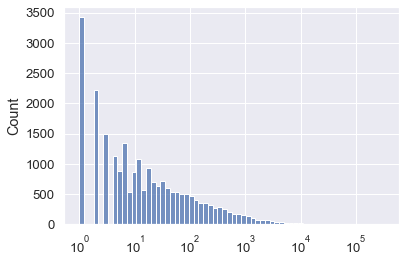

In [62]:
sns.histplot(list(mention_count.values()), log_scale=True)

<AxesSubplot:ylabel='Count'>

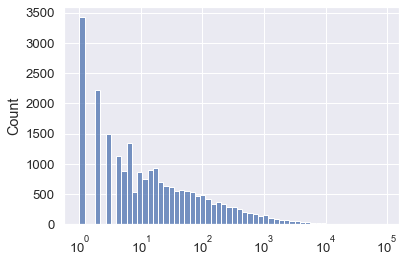

In [63]:
sns.histplot(list([k for k in mention_count.values() if k <100000]), log_scale=True)

In [64]:
len([k for k in mention_count.values() if k <5])*100/len(mention_count)

35.31973021429181

In [65]:
(1-0.35)*len(mention_count)

15226.9

## For each subreddit let's count how many news sources were mentioned in it

Counting how many news sources were mentioned in each subreddit

In [66]:
nsc_count = dict()
for sr in sr_union:
    nsc_count[sr] = len(set(subreddit_ns_jan.get(sr, dict()).keys()) 
                               | set(subreddit_ns_feb.get(sr, dict()).keys()) 
                               | set(subreddit_ns_march.get(sr, dict()).keys()) 
                               | set(subreddit_ns_april.get(sr, dict()).keys())
                               | set(subreddit_ns_may.get(sr, dict()).keys()) 
                               | set(subreddit_ns_jun.get(sr, dict()).keys()))

`nsc_count` stores how many news sources appear in each subreddit.

In [67]:
len([k for k in nsc_count if nsc_count[k]<1])

0

In [68]:
nsc_count_freq = dict(Counter(nsc_count.values()).most_common())
nsc_count_freq

{1: 15474,
 2: 5140,
 3: 3106,
 4: 2196,
 5: 1656,
 6: 1456,
 7: 1126,
 8: 1031,
 9: 897,
 10: 748,
 11: 655,
 12: 565,
 13: 532,
 14: 475,
 16: 396,
 15: 385,
 18: 344,
 17: 339,
 19: 313,
 20: 302,
 22: 240,
 21: 236,
 24: 208,
 23: 207,
 25: 206,
 27: 189,
 26: 171,
 29: 170,
 28: 157,
 30: 148,
 32: 141,
 31: 137,
 33: 132,
 35: 117,
 34: 116,
 36: 107,
 37: 106,
 39: 103,
 40: 97,
 42: 83,
 41: 78,
 43: 78,
 38: 77,
 44: 76,
 49: 75,
 52: 74,
 45: 68,
 51: 65,
 47: 63,
 53: 61,
 48: 60,
 50: 58,
 46: 58,
 55: 53,
 59: 53,
 56: 53,
 58: 45,
 61: 43,
 63: 43,
 54: 42,
 62: 40,
 66: 40,
 67: 36,
 57: 36,
 77: 35,
 60: 34,
 68: 34,
 64: 34,
 65: 33,
 80: 33,
 71: 32,
 74: 31,
 82: 29,
 69: 28,
 73: 28,
 70: 27,
 75: 26,
 88: 26,
 72: 26,
 86: 23,
 93: 23,
 78: 22,
 85: 22,
 81: 22,
 83: 21,
 84: 21,
 110: 20,
 76: 20,
 79: 20,
 91: 19,
 101: 19,
 89: 19,
 103: 18,
 94: 18,
 87: 18,
 116: 18,
 97: 18,
 104: 17,
 98: 17,
 118: 17,
 132: 15,
 112: 15,
 107: 15,
 140: 15,
 124: 15,
 95: 1

`nsc_count_freq` keeps track of how many news sources appear in *n* subreddits for all possible *n*.

In [69]:
max(nsc_count_freq.keys())

3603

In [70]:
nsc_ranked = Counter(nsc_count).most_common()

for t in nsc_ranked:
    sr, co = t
    if co >= 80:
        print(f"{sr} has {co} news sources mentioned in it.")

COVID_CANADA has 3603 news sources mentioned in it.
news has 3452 news sources mentioned in it.
politics has 3044 news sources mentioned in it.
todayilearned has 2949 news sources mentioned in it.
Coronavirus has 2613 news sources mentioned in it.
worldnews has 2564 news sources mentioned in it.
nottheonion has 2444 news sources mentioned in it.
prisons has 2309 news sources mentioned in it.
NoFilterNews has 2255 news sources mentioned in it.
conspiracy has 2099 news sources mentioned in it.
wallstreetbets has 1999 news sources mentioned in it.
tomorrowsworld has 1877 news sources mentioned in it.
autotldr has 1754 news sources mentioned in it.
Conservative has 1729 news sources mentioned in it.
NoNewNormal has 1592 news sources mentioned in it.
CryptoCurrency has 1543 news sources mentioned in it.
technology has 1523 news sources mentioned in it.
europe has 1432 news sources mentioned in it.
electionReformNews has 1423 news sources mentioned in it.
HumanTraffickingNews has 1338 news s

In [71]:
sum(nsc_count_freq.values()) == len(sr_union)

True

In [72]:
import itertools

In [73]:
nsc = list(itertools.chain.from_iterable(itertools.repeat(k,v) for k,v in nsc_count_freq.items()))

Text(0.5, 1.0, 'number of subreddits with x news sources')

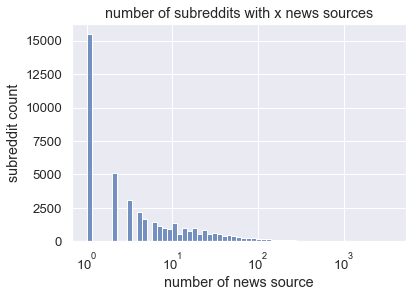

In [74]:
sns.histplot(nsc, log_scale=True)
plt.xlabel("number of news source")
plt.ylabel("subreddit count")
plt.title("number of subreddits with x news sources")

In [75]:
len([n for n in nsc if n>=20])

6966

How many subreddits only mentioned 5 news sources or less?

In [76]:
def pct_subreddits_mentioning_k_newssources(ks):
    sr_mention_i_nsc = [k for k in nsc_count if nsc_count[k] <= ks]
    count = len(sr_mention_i_nsc)
    print("There are {} subreddits mentioning in only {} news sources or less ({}%)".format(count, ks, count/len(sr_union)))
    return count/len(sr_union)

In [77]:
pct_subreddits_mentioning_k_newssources(20)

There are 37136 subreddits mentioning in only 20 news sources or less (0.8478538812785388%)


0.8478538812785388

In [78]:
# mean
statistics.mean(nsc)

17.059817351598173

In [79]:
# median
statistics.median(nsc)

3.0

In [80]:
(1-pct_subreddits_mentioning_k_newssources(100)) * len(nsc_count)

There are 42415 subreddits mentioning in only 100 news sources or less (0.9683789954337899%)


1385.0000000000018

### Let's disregard subreddits that mention less than 20 news sources

In [81]:
subreddit_non_outlier = [k for k in nsc_count if nsc_count[k] >= 100]

In [82]:
len(subreddit_non_outlier)

1396

## For each subreddit let's count total submissions that are news source related

In [83]:
def get_submission_count(sb):
    """get total mention count of ns in all six months"""
    count = 0
    files = [subreddit_ns_jan, subreddit_ns_feb, subreddit_ns_march, subreddit_ns_april, subreddit_ns_may, subreddit_ns_jun]
    for f in files:
        sb_dict = f.get(sb, dict())
        if len(sb_dict) > 0:
            mentions = sum([m[0] for m in sb_dict.values()])
            count += mentions
    return count

In [84]:
mention_count = dict()
for sb in sr_union:
    mention_count[sb] = get_submission_count(sb)

In [85]:
statistics.mean(mention_count.values())

160.93561643835616

In [86]:
statistics.stdev(mention_count.values())

3216.3764939913694

In [87]:
statistics.median(mention_count.values())

5.0

In [88]:
len(mention_count)

43800

In [89]:
Counter(mention_count).most_common(20)

[('AutoNewspaper', 582301),
 ('politics', 136901),
 ('TheNewsFeed', 91784),
 ('news', 84659),
 ('TrendingQuickTVnews', 82824),
 ('COVID_CANADA', 76571),
 ('worldnews', 68589),
 ('Conservative', 53943),
 ('THEHINDUauto', 44130),
 ('niuz', 43845),
 ('NoFilterNews', 43262),
 ('FakeCollegeFootball', 41241),
 ('nofeenews', 40684),
 ('TORONTOSTARauto', 39281),
 ('trendandstyle', 38133),
 ('CertifiedNews', 38011),
 ('WrestlingBreakingNews', 37277),
 ('FOXauto', 36228),
 ('NewsfeedForWork', 34863),
 ('Coronavirus', 34076)]

In [90]:
ns_subreddit_01['cbc.ca']

{'todayilearned': [17, 14.780000000000001, 2038],
 'JoeRogan': [1, 0.76, 3],
 'knowyourshit': [3, 2.92, 1],
 'collapse': [7, 6.280000000000001, 58],
 'marginal': [3, 3.0, 0],
 'conspiracy': [11, 8.9, 649],
 'politics': [121, 107.37999999999998, 227661],
 'CPTSD': [1, 1.0, 1],
 'VideoEditing': [1, 0.98, 38],
 'wallstreetbets': [15, 13.129999999999999, 115],
 'hackernews': [8, 5.92, 8],
 'patient_hackernews': [8, 8.0, 8],
 'unitedkingdom': [2, 1.82, 19],
 'Catholicism': [1, 1.0, 2],
 'books': [6, 5.2, 15],
 'hackerdigest': [1, 1.0, 0],
 'Snorkblot': [2, 2.0, 2],
 'UnresolvedMysteries': [18, 17.439999999999998, 1033],
 'TrueUnpopularOpinion': [2, 1.3, 32],
 'SPACs': [2, 1.8, 152],
 'aznidentity': [1, 0.98, 40],
 'badgovnofreedom': [34, 34.0, 1],
 'cyberpunkgame': [1, 0.4, 3],
 'CBC_': [9, 8.84, 1],
 'newjersey': [1, 0.8, 25],
 'newfoundland': [28, 25.439999999999994, 406],
 'Hamilton': [42, 35.79, 950],
 'Oshawa': [1, 0.9, 5],
 'RedditTLDR': [5, 4.67, 1],
 'Sino': [1, 0.96, 18],
 'Sorcere

<AxesSubplot:ylabel='Count'>

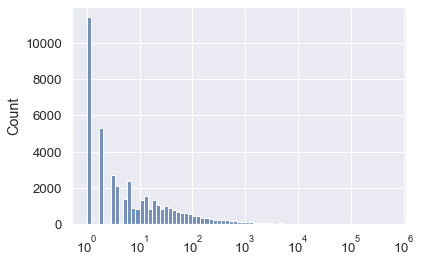

In [91]:
sns.histplot(list(mention_count.values()), log_scale=True)

In [92]:
len([k for k in mention_count.values() if k <5])*100/len(mention_count)

49.13470319634703

In [93]:
(1-0.35)*len(mention_count)

28470.0

In [94]:
non_outlier = [n for n in ns_union if subreddit_count[n]>50]
len(non_outlier)

2659

## Cluster Try Out

First, I make a list of subreddits with fixed order, where I only include subreddits where our non_outlier news sources are mentioned in.

In [95]:
len(non_outlier)

2659

In [96]:
# only intersection
len(set(non_outlier) & set(nss))

2643

In [97]:
non_outlier = list(set(non_outlier) & set(nss))

In [98]:
len(non_outlier)

2643

In [99]:
# subreddits = subs
subreddits = set()
nsr_files = [ns_subreddit_01, ns_subreddit_02, ns_subreddit_03, ns_subreddit_04, ns_subreddit_05, ns_subreddit_06]
# first, I filter for only the subreddits in which our news sources are mentioned
c = 0
for n in non_outlier:
    subreddits = (subreddits | (set(ns_subreddit_01.get(n, dict()).keys()) 
                               & set(ns_subreddit_02.get(n, dict()).keys()) 
                               & set(ns_subreddit_03.get(n, dict()).keys()) 
                               & set(ns_subreddit_04.get(n, dict()).keys())
                               & set(ns_subreddit_05.get(n, dict()).keys()) 
                               & set(ns_subreddit_06.get(n, dict()).keys())))
    c += 1
    if c%100==0: print(f"done {c}")
subreddits = list(subreddits)
len(subreddits)

done 100
done 200
done 300
done 400
done 500
done 600
done 700
done 800
done 900
done 1000
done 1100
done 1200
done 1300
done 1400
done 1500
done 1600
done 1700
done 1800
done 1900
done 2000
done 2100
done 2200
done 2300
done 2400
done 2500
done 2600


3763

There are 4k subreddits.

In [100]:
len(set(subreddits) & set(subreddit_non_outlier))

1140

In [101]:
subreddits = list(set(subreddits) & set(subreddit_non_outlier))

In [102]:
subreddits[-10:]

['kotakuinaction2',
 'autism',
 'teslainvestorsclub',
 'News_Construction',
 'Cooking',
 'cats',
 'CoronavirusUK',
 'Cricket',
 'CanadianInvestor',
 'Futurology']

If I should order them later, I can do so.

## Incorporating subscribers information

In [103]:
pd1 = os.path.split(os.getcwd())[0]
data_fp = os.path.join(pd1,"data/gm-newssources-subreddits")
dfp = os.path.join(pd1,"data")

In [104]:
sfp = os.path.join(pd1,"data/subreddits")

In [105]:
# Let's only use the subreddits that have lots of subscribers
with open (os.path.join(sfp,"subreddit_subscribers.json"), "r", encoding = "utf-8") as infile:
    subreddit_subscribers = json.load(infile)

In [106]:
subreddit_subscribers['politics']

6201779

In [107]:
len(subreddit_subscribers)

49055

In [108]:
len(subreddits)

1140

In [109]:
subreddits_w_subc = [k for k in subreddits if k in subreddit_subscribers]
len(subreddits_w_subc)

1035

It seems that there are `None` values, so let's filter those subreddits out.

In [110]:
print([s for s in subreddits_w_subc if subreddit_subscribers[s] is None])

[]


In [111]:
subreddits_w_subc = [s for s in subreddits_w_subc if subreddit_subscribers[s] is not None]

In [112]:
len(subreddits_w_subc)

1035

Now, I will sort the 8,294 subreddits based on the # of their subscribers in a descending order.

In [113]:
srs_all = sorted(subreddits_w_subc, key= lambda x: subreddit_subscribers[x], reverse= True)

Text(0.5, 1.0, 'Subreddits Subscribers')

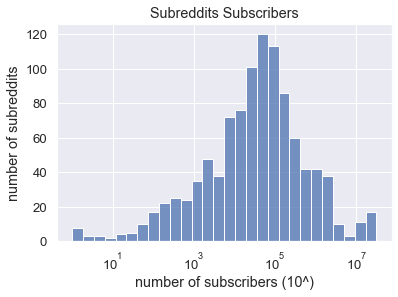

In [114]:
# plt.hist([math.log(subreddit_subscribers[s],10) for s in srs_all if subreddit_subscribers[s] > 0])
sns.histplot([subreddit_subscribers[s] for s in srs_all if subreddit_subscribers[s]>0], log_scale=True)
# plt.hist([subreddit_subscribers[s] for s in srs_all if subreddit_subscribers[s] > 0])
# plt.yscale("log")
# plt.xscale("log")
plt.ylabel("number of subreddits")
plt.xlabel("number of subscribers (10^)")
plt.title("Subreddits Subscribers")
# log scale for both x and y

Which subreddits are the top three?

In [115]:
print([(s,subreddit_subscribers[s]) for s in srs_all if subreddit_subscribers[s]>10000])

[('funny', 31060166), ('gaming', 26628444), ('pics', 24911449), ('science', 24268001), ('worldnews', 24253881), ('Music', 24041486), ('videos', 23114010), ('movies', 23087255), ('todayilearned', 23030716), ('news', 20935015), ('askscience', 19222916), ('books', 18078148), ('Art', 17826701), ('sports', 17292578), ('nottheonion', 17063313), ('space', 16937271), ('gadgets', 16890685), ('television', 16595714), ('UpliftingNews', 15926382), ('InternetIsBeautiful', 15019126), ('history', 14885003), ('philosophy', 14818794), ('Futurology', 14675526), ('dataisbeautiful', 14612638), ('personalfinance', 14176579), ('TwoXChromosomes', 12782590), ('memes', 10670593), ('technology', 9065541), ('WTF', 6224561), ('politics', 6201779), ('interestingasfuck', 5807636), ('travel', 4489082), ('leagueoflegends', 4184297), ('facepalm', 4046462), ('NatureIsFuckingLit', 3790070), ('pcmasterrace', 3722335), ('Whatcouldgowrong', 3569470), ('nba', 3310886), ('PS4', 3291344), ('photography', 2875552), ('programmi

In [116]:
list(subreddit_subscribers.values()).count(None)

25

In [117]:
statistics.median([k for k in list(subreddit_subscribers.values()) if k is not None])

1420.0

In [118]:
statistics.mean([k for k in list(subreddit_subscribers.values()) if k is not None])

50070.832184376915

## Building `ns_repr`

Which will be in the form of feature-based matrix, where each row represents a news source, and columns representing subreddits. 

Idea 1: Each subreddit will be represented by 18 columns: unweighted count, upvote based weighted count, and comment based weighted count for each of the six months that we are interested in. THIS does not work.

Idea 2: Each subreddit will be represented by 3 columns: average unweighted count, average upvote based weighted count, and average comment based weighted count.

In [119]:
srs = srs_all

In [120]:
a = {"a": 1, "b": 2}
b = {"b": 1, "c": 2}
res = {**a, **b}
res

{'a': 1, 'b': 1, 'c': 2}

Idea 1: For each news source, I create a list of length `(18 * # subreddits)`.

Idea 1: For each news source, I create a list of length `(3 * # subreddits)`

Old code
```
# here I will cast the inner dictionaries of ns_subreddits to be Counter so I can avoid a lot of if-else statements
files = [ns_subreddit_01, ns_subreddit_02, ns_subreddit_03, ns_subreddit_04, ns_subreddit_05, ns_subreddit_06]
for f in files:
    for k in f: # k is each news source
        for ns in f[k]:
            # averaging based on weighted counts
            count, upv, comm = f[k][ns]
            avg = (upv + comm)/count
            f[k][ns] = avg
        f[k] = Counter(f[k])
```

In [121]:
files_sub = [subreddit_ns_jan, subreddit_ns_feb, subreddit_ns_march, subreddit_ns_april, subreddit_ns_may, subreddit_ns_jun]
files_ns = [ns_subreddit_01, ns_subreddit_02, ns_subreddit_03, ns_subreddit_04, ns_subreddit_05, ns_subreddit_06]

In [122]:
len(non_outlier)

2643

In [123]:
len(srs)

1035

I tried and found out that using all 23.7k subreddits results in MemoryError. So I should use less

In [124]:
srs = srs_all

For idea 1:

```
ns_sr_rep = defaultdict(list)
default_counter = Counter() # to avoid a lot of if else statements

ncount = 0

# for ns in nss:
for ns in non_outlier:
    # for each news sources, construct the 18*length(subreddits) features
    for f in files_sub:
        for idx in range(len(srs)):
            # making sure the ordering follows `srs` based on subscribers
            ns_sr_rep[ns] += f[ns][srs[idx]][1:] if (ns in f and srs[idx] in f[ns]) else [0, 0]
    ncount += 1
    if ncount%200==0: print(ncount)
```

In [125]:
# For idea 2

ns_sr_rep = defaultdict(list)
default_counter = Counter() # to avoid a lot of if else statements

ncount = 0

# for ns in nss:
for ns in non_outlier:
    # for each news sources, construct the length(subreddits) features
    for idx in range(len(srs)):
        # making sure the ordering follows `srs` based on subscribers
        current_sr = srs[idx]
        # avg_unweighted_counts = sum([ii[current_sr][ns][0] if current_sr in ii and ns in ii[current_sr] else 0 for ii in files_sub])/6
        avg_votebased_counts = sum([ii[current_sr][ns][1] if (current_sr in ii and ns in ii[current_sr]) else 0 for ii in files_sub])/6
        avg_commentbased_counts = sum([ii[current_sr][ns][2] if current_sr in ii and ns in ii[current_sr] else 0 for ii in files_sub])/6
        ns_sr_rep[ns] += [avg_votebased_counts, avg_commentbased_counts]
    ncount += 1
    if ncount%500==0: print(ncount)

500
1000
1500
2000
2500


In [126]:
len(srs)

1035

In [127]:
len(non_outlier)

2643

    code started at 22:56

Let's see one example of representation for `nytimes.com`.

In [128]:
ns_sr_rep["bbc.co.uk"]

[2.1533333333333333,
 3.6666666666666665,
 5.159999999999999,
 27.0,
 0.0,
 0.0,
 3.595,
 132.83333333333334,
 228.93999999999997,
 11514.833333333334,
 3.1966666666666668,
 15.0,
 2.19,
 0.6666666666666666,
 3.936666666666667,
 162.33333333333334,
 42.788333333333334,
 2610.8333333333335,
 141.6733333333333,
 5919.333333333333,
 0.31,
 180.0,
 1.0216666666666667,
 413.1666666666667,
 0.2333333333333333,
 0.5,
 6.336666666666669,
 223.33333333333334,
 64.68,
 3033.5,
 5.613333333333333,
 443.1666666666667,
 0.3133333333333333,
 85.83333333333333,
 5.836666666666666,
 441.8333333333333,
 21.083333333333332,
 821.1666666666666,
 0.049999999999999996,
 1.0,
 2.478333333333333,
 120.16666666666667,
 0.12833333333333333,
 1.0,
 3.045,
 304.8333333333333,
 0.11499999999999999,
 0.0,
 0.0,
 0.0,
 3.9250000000000003,
 322.6666666666667,
 0.16666666666666666,
 0.16666666666666666,
 17.37,
 1391.5,
 1.9116666666666668,
 6.333333333333333,
 43.33666666666667,
 51873.333333333336,
 3.4483333333333

Let's investigate the sparsity of our data

In [129]:
from numpy import array
from numpy import count_nonzero
from scipy.sparse import csr_matrix

In [130]:
# ns_repr, ns_fixed = np.array([v[1] for v in items]), list([v[0] for v in items]) # this causes memory error
## MemoryError: Unable to allocate 15.3 GiB for an array with shape (11436, 180000) and data type float64
items = ns_sr_rep.items()
ns_repr = np.array([k for k in ns_sr_rep.values()])

In [131]:
ns_repr[:10]

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.57666667, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.16666667, 0.        ,
        0.        ]])

In [132]:
sparsity = 1.0 - np.count_nonzero(ns_repr)/ns_repr.size

In [133]:
sparsity

0.9313574641610964

In [134]:
# len([k for k in ns_repr if sum(k)==0.0]) # number of news sources with all 0's = 3

Wow very high sparsity.

In [135]:
len(non_outlier)

2643

How many subreddits have all 0's for all news sources?

    counter = 0
    for ii in range(len(srs)):
        fl = []
        for kk in ns_repr:
            fl.append(kk[ii])
        counter += 1
        print(statistics.median(fl), statistics.mean(fl), statistics.variance(fl), counter)

In [136]:
# convert to sparse matrix (CSR method)
S = csr_matrix(ns_repr)
print(S)

  (0, 8)	0.3333333333333333
  (0, 18)	0.3333333333333333
  (0, 54)	0.16666666666666666
  (0, 146)	0.16666666666666666
  (0, 156)	2.2883333333333336
  (0, 157)	10.666666666666666
  (0, 212)	39.20666666666667
  (0, 213)	12.5
  (0, 236)	0.16666666666666666
  (0, 268)	0.16666666666666666
  (0, 304)	0.5
  (0, 305)	0.16666666666666666
  (0, 344)	0.2966666666666667
  (0, 345)	121.33333333333333
  (0, 374)	0.16666666666666666
  (0, 378)	0.3333333333333333
  (0, 379)	0.16666666666666666
  (0, 442)	8.926666666666668
  (0, 443)	3.8333333333333335
  (0, 454)	1.27
  (0, 455)	4.333333333333333
  (0, 508)	0.16666666666666666
  (0, 538)	1.8316666666666668
  (0, 539)	855.8333333333334
  (0, 666)	0.16666666666666666
  :	:
  (2642, 1513)	6.666666666666667
  (2642, 1556)	0.16666666666666666
  (2642, 1588)	0.62
  (2642, 1589)	48.666666666666664
  (2642, 1608)	0.48
  (2642, 1609)	10.666666666666666
  (2642, 1724)	0.16666666666666666
  (2642, 1746)	0.3333333333333333
  (2642, 1830)	0.13999999999999999
  (264

### Now PCA

In [137]:
print([k for k in ns_repr[21:50]])

[array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0.        , 0.        , 0.16666667, ..., 0.        , 0.        ,
       0.        ]), array([ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.29, 50.  ]), array([0.16666667, 0.16666667, 0.        , ..., 0.        , 0.        ,
       0.        ]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0.        , 0.        , 0.16666667, ..., 0.        , 0.        ,
       0.        ]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0.,

In [138]:
len(ns_repr)

2643

In [139]:
len(ns_repr[0])/2

1035.0

In [140]:
svd = TruncatedSVD(n_components=1000) #, n_iter=7, random_state=42)
svd_pca = PCA(n_components=min(len(ns_repr), len(ns_repr[0])))

In [141]:
# fit1 = svd.fit(csr_matrix(MaxAbsScaler().fit_transform(np.array(ns_repr))))
fit1 = svd_pca.fit(StandardScaler().fit_transform(np.array(ns_repr)))

In [142]:
explained_var = fit1.explained_variance_ratio_

In [143]:
explained_var[:10]

array([0.15789766, 0.03065203, 0.02409429, 0.01931662, 0.01833601,
       0.01668201, 0.01625712, 0.0137726 , 0.01229337, 0.01208309])

    # what about if PCA into 4
    svd_pca4 = PCA(n_components=4)
    fit4 = svd_pca4.fit(StandardScaler().fit_transform(np.array(ns_repr)))
    explained_var4 = fit4.explained_variance_ratio_
    explained_var4 # array([0.15789766, 0.03065203, 0.02409428, 0.01931646])

So PCA into 2k then extracting the first 4 is the same as PCA into 4

In [144]:
len(explained_var)

2070

In [145]:
fit1.explained_variance_ratio_.sum()

1.0

In [146]:
explained_var_sums = [sum(explained_var[:d]) for d in range(len(explained_var))]

In [147]:
explained_var_sums

[0,
 0.15789766269132277,
 0.18854969298059004,
 0.21264398582982005,
 0.23196060787395084,
 0.2502966137992464,
 0.26697862497174485,
 0.283235740965944,
 0.29700834228049616,
 0.309301715943423,
 0.32138480986285944,
 0.33214804759178274,
 0.3423426164656998,
 0.3519270234177638,
 0.3604993072418862,
 0.3686810549271878,
 0.37661367014785496,
 0.3843523141399466,
 0.39189511286545103,
 0.3989989267855129,
 0.4059312802671062,
 0.41264634213680385,
 0.4189039342362888,
 0.42509701527006294,
 0.4309623900616215,
 0.4366931436388088,
 0.4421372619255655,
 0.4474467377108855,
 0.4526265989650754,
 0.45770476791252374,
 0.46266639054991426,
 0.4674222069040722,
 0.47208964104602597,
 0.47652900469111975,
 0.4807374176402154,
 0.4849272150611093,
 0.48896255572743913,
 0.4928861733481727,
 0.49670610652270264,
 0.5004433075921613,
 0.5041748247920703,
 0.5078794804596493,
 0.5114068648287703,
 0.5148929813488787,
 0.5182367289530787,
 0.5215343007514733,
 0.5247693406330136,
 0.52795697850

<AxesSubplot:>

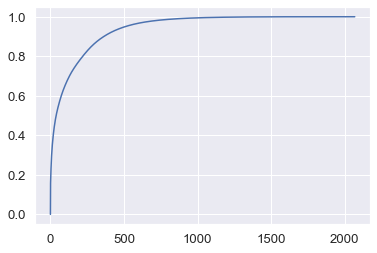

In [148]:
sns.lineplot(x=range(len(explained_var_sums)), y=explained_var_sums)

Now, I will cast those list representation values to be numpy arrays so I can preprocess them easily. Further, I will normalize each array.

*side note: `preprocessing.normalize` vs `standardscaler`*

In [149]:
preprocessing.normalize(np.array([[1,100,2,3],[2,50,100,10]]))

array([[0.00999301, 0.99930073, 0.01998601, 0.02997902],
       [0.01781459, 0.44536472, 0.89072943, 0.08907294]])

In [150]:
scaler = StandardScaler()
scaler.fit_transform(np.array([[1,100,2,3],[2,50,100,10],[2,50,100,10]]))

array([[-1.41421356,  1.41421356, -1.41421356, -1.41421356],
       [ 0.70710678, -0.70710678,  0.70710678,  0.70710678],
       [ 0.70710678, -0.70710678,  0.70710678,  0.70710678]])

Now I'm thinking, should I *normalize* or *standardize*?

In [151]:
# for ns in ns_sr_rep:
#     rep = ns_sr_rep[ns]
#     ns_sr_rep[ns] = preprocessing.normalize(np.array([rep]))

## K-Means

Without and with standardization.

First, I need to find optimum `k`.

In [152]:
# ns_repr_new = fit1.transform(MaxAbsScaler().fit_transform(np.array(ns_repr))) #fit1 is PCA
ns_repr_new = fit1.transform(StandardScaler().fit_transform(np.array(ns_repr))) #fit1 is PCA

In [ ]:
json.dump(ns_repr_new, open("ns_repr_new.json", "w"))

In [153]:
ns_repr_new = [k[:100] for k in ns_repr_new]

In [154]:
kmeans = KMeans(init = "k-means++",
               n_clusters = 5,
               n_init = 10,
               max_iter = 100)

Freezing the list for representations and the news sources.

In [155]:
kmeans.fit([v for v in ns_repr_new])

KMeans(max_iter=100, n_clusters=5)

In [156]:
ns_fixed = list(ns_sr_rep.keys())

In [157]:
for i,ns in enumerate(ns_fixed):
    if (ns_sr_rep[ns] == ns_repr[i]).all():
        pass
    else:
        print("False")
print("True")

True


In [158]:
kmeans.inertia_

2600706.163398965

In [159]:
kmeans.n_iter_

5

In [160]:
Counter(kmeans.labels_)

Counter({0: 2614, 1: 18, 2: 1, 3: 9, 4: 1})

**Choosing the appropriate number of clusters**

1. Elbow method

In [161]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 360
}

In [162]:
sse = []
sc = []
chs = [] # bigger better
dbs = []

for k in range(2,41):
    kmeans = KMeans(n_clusters = k, **kmeans_kwargs)
    kmeans.fit(ns_repr_new)
    sse.append(kmeans.inertia_)
    score = silhouette_score(ns_repr_new, kmeans.labels_)
    sc.append(score)
    chs_score = metrics.calinski_harabasz_score(ns_repr_new, kmeans.labels_)
    chs.append(chs_score)
    dbs_score = metrics.davies_bouldin_score(ns_repr_new, kmeans.labels_)
    dbs.append(dbs_score)
    print(f"have done {k} rounds, current sse is {sse}")

have done 2 rounds, current sse is [2969673.4322174047]
have done 3 rounds, current sse is [2969673.4322174047, 2780557.9989209473]
have done 4 rounds, current sse is [2969673.4322174047, 2780557.9989209473, 2716054.3701258916]
have done 5 rounds, current sse is [2969673.4322174047, 2780557.9989209473, 2716054.3701258916, 2663682.016019164]
have done 6 rounds, current sse is [2969673.4322174047, 2780557.9989209473, 2716054.3701258916, 2663682.016019164, 2623886.4398023817]
have done 7 rounds, current sse is [2969673.4322174047, 2780557.9989209473, 2716054.3701258916, 2663682.016019164, 2623886.4398023817, 2576826.3967032856]
have done 8 rounds, current sse is [2969673.4322174047, 2780557.9989209473, 2716054.3701258916, 2663682.016019164, 2623886.4398023817, 2576826.3967032856, 2549690.0289440514]
have done 9 rounds, current sse is [2969673.4322174047, 2780557.9989209473, 2716054.3701258916, 2663682.016019164, 2623886.4398023817, 2576826.3967032856, 2549690.0289440514, 2512997.536071052

have done 29 rounds, current sse is [2969673.4322174047, 2780557.9989209473, 2716054.3701258916, 2663682.016019164, 2623886.4398023817, 2576826.3967032856, 2549690.0289440514, 2512997.536071052, 2478483.199413249, 2408503.1200837665, 2365654.387687141, 2324751.5505874287, 2303937.733410754, 2252754.2765566595, 2222442.070886037, 2219470.482870746, 2197599.965401203, 2183971.4487625537, 2186750.051418997, 2158245.2783187265, 2141059.6956762634, 2114392.2278228165, 2084485.9701593793, 2020433.0848314916, 2010769.1303980995, 2046042.5279755446, 2036829.4143510524, 1965164.978819317]
have done 30 rounds, current sse is [2969673.4322174047, 2780557.9989209473, 2716054.3701258916, 2663682.016019164, 2623886.4398023817, 2576826.3967032856, 2549690.0289440514, 2512997.536071052, 2478483.199413249, 2408503.1200837665, 2365654.387687141, 2324751.5505874287, 2303937.733410754, 2252754.2765566595, 2222442.070886037, 2219470.482870746, 2197599.965401203, 2183971.4487625537, 2186750.051418997, 21582

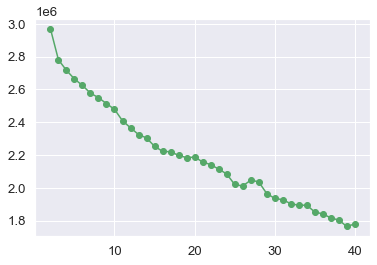

In [163]:
plt.plot(range(2,41),sse,"go-")

In [164]:
kl = KneeLocator(range(2,41), sse, curve="convex", direction="decreasing")

In [165]:
kl.elbow

15

### Silhouette Coefficient

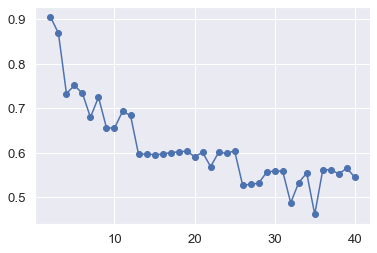

In [166]:
# for silhouette coefficient
plt.plot(range(2,41), sc, "bo-")

    spl = make_interp_spline(range(2,30), sc, k=3)  # type: BSpline

    xs = np.linspace(2, 30, 6)
    ys = spl(xs)

    plt.plot(range(2,30), sc, "go--")
    plt.plot(xs, ys, "b-")

### CHS

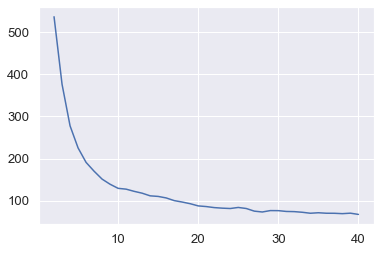

In [168]:
plt.plot(range(2,41), chs)

### DBS

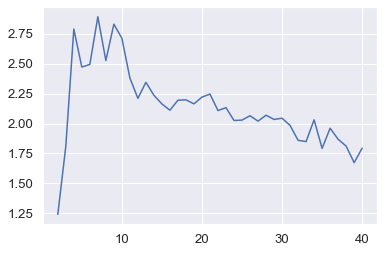

In [169]:
plt.plot(range(2, 41), dbs)

Let's choose k = 10

In [170]:
kmeans = KMeans(n_clusters = 10, init="k-means++", n_init = 50, max_iter = 500, random_state = 360)
kmeans.fit(ns_repr_new)

KMeans(max_iter=500, n_clusters=10, n_init=50, random_state=360)

In [171]:
kmeans.labels_

array([6, 6, 6, ..., 6, 6, 6])

In [172]:
set(kmeans.labels_)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [173]:
Counter(kmeans.labels_)

Counter({6: 2591, 7: 1, 9: 1, 3: 9, 0: 33, 4: 4, 2: 1, 1: 1, 8: 1, 5: 1})

**Let's investigate each cluster**

In [174]:
len(ns_sr_rep)

2643

In [175]:
len(kmeans.labels_)

2643

In [176]:
clustered = defaultdict(list)
for idx,ns in enumerate(non_outlier):
    c = kmeans.labels_[idx]
    clustered[c].append(ns)

In [177]:
print([len(clustered[i]) for i in range(10)])

[33, 1, 1, 9, 4, 1, 2591, 1, 1, 1]


Let's see in terms of percentage

In [178]:
cluster_lens = [len(clustered[i]) for i in range(10)]

In [179]:
print([round(k*100/sum(cluster_lens),2) for k in cluster_lens])

[1.25, 0.04, 0.04, 0.34, 0.15, 0.04, 98.03, 0.04, 0.04, 0.04]


 **could do iterative clusters for ^**

In [180]:
clustered[0]

['theverge.com',
 'nature.com',
 'globalnews.ca',
 'cbslocal.com',
 'vox.com',
 'foxnews.com',
 'huffpost.com',
 'abc.net.au',
 'salon.com',
 'usatoday.com',
 'rt.com',
 'msn.com',
 'nih.gov',
 'arstechnica.com',
 'theatlantic.com',
 'latimes.com',
 'aljazeera.com',
 'breitbart.com',
 'sciencedirect.com',
 'vice.com',
 'nypost.com',
 'jacobinmag.com',
 'thedailybeast.com',
 'rawstory.com',
 'cbc.ca',
 'theintercept.com',
 'axios.com',
 'commondreams.org',
 'cbsnews.com',
 'dailymail.co.uk',
 'cdc.gov',
 'politico.com',
 'ctvnews.ca']

# Agglomerative (Hierarchical) Clustering

In [181]:
hclustering = AgglomerativeClustering(n_clusters=15)

In [182]:
hclustering.fit(ns_repr_new)

AgglomerativeClustering(n_clusters=15)

In [183]:
hclustering.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [184]:
hier_clustered = defaultdict(list)
for idx,ns in enumerate(non_outlier):
    c = hclustering.labels_[idx]
    hier_clustered[c].append(ns)

In [185]:
print([len(hier_clustered[i]) for i in range(15)])

[2604, 4, 2, 1, 2, 13, 6, 1, 1, 1, 1, 2, 2, 1, 2]


Let's see in terms of percentage

In [186]:
hcluster_lens = [len(hier_clustered[i]) for i in range(10)]

In [187]:
print([round(k*100/sum(hcluster_lens),2) for k in hcluster_lens])

[98.82, 0.15, 0.08, 0.04, 0.08, 0.49, 0.23, 0.04, 0.04, 0.04]


In [188]:
hier_clustered[1]

['variety.com', 'fandom.com', 'deadline.com', 'hollywoodreporter.com']

In [189]:
set(hier_clustered[0]) & set(clustered[4])

set()

## Visualizing PCA in 2D using tSNE

t-sne scales quadratically but perhaps we can run tSNE after PCA

In [190]:
from sklearn.manifold import TSNE

In [211]:
twodpca = TSNE(n_components=4, perplexity=50, method="exact")

In [212]:
from datetime import datetime

In [213]:
# fit2 = twodpca.fit_transform(MaxAbsScaler().fit_transform(np.array(ns_repr)))
# fit2 = twodpca.fit_transform(StandardScaler().fit_transform(np.array(ns_repr)))
fit2 = twodpca.fit_transform(ns_repr_new)

In [214]:
x = [k[0] for k in fit2]
y = [k[1] for k in fit2]
z = [k[2] for k in fit2]
a = [k[3] for k in fit2]

Idea: show only news sources that are close to a particular news source

In [215]:
import plotly.express as px
import pandas

ns_fixed = list(ns_sr_rep.keys())

df = pandas.DataFrame({"pc1": x[:1000],
                   "pc2": y[:1000],
                   "pc3": z[:1000],
                   "pc4": a[:1000],
                   "source": ns_fixed[:1000]})

fig = px.scatter_3d(df, x='pc1', y='pc2', z='pc3', 
                    color='pc4',
                    hover_name='source', opacity=0.4)
fig.show()

In [196]:
len(ns_repr_new)

2643

In [197]:
len(srs)

1035

In [198]:
len(ns_repr_new[0])

100

## Clustering evaluation

1. With all ns_intersection that are not outliers using subreddits that are not outliers => one cluster has almost everything.

In [199]:
# closer to 1 better
metrics.silhouette_score(ns_repr_new, kmeans.labels_, metric='euclidean', sample_size=3000)

# With all ns_union that are not outliers using subreddits that are not outliers => one cluster has almost everything.
# 8k news sources, _ subreddits, _ PCs
# 0.8726470867482576

# With all ns_intersection that are not outliers (th = 10) using subreddits that are not outliers (th = 100) => one cluster has almost everything.
# 7060 news sources, 2662 subreddits, 100 PCs, 10 clusters
# 0.9426717858025625

# With ns_intersection that are not outliers (th = 50) using subreddits that are not outliers (th = 100) => one cluster has almost everything.
# 2643 news sources, 1035 subreddits, 100 PCs, 10 clusters
# 0.8429645622533072

0.8346856565731591

In [200]:
# higher better
metrics.calinski_harabasz_score(ns_repr_new, kmeans.labels_)

# With all ns_intersection that are not outliers using subreddits that are not outliers => one cluster has almost everything.
# 8k news sources, _ subreddits, _ PCs
# 241.70519991875474

# With all ns_intersection that are not outliers (th = 10) using subreddits that are not outliers (th = 100) => one cluster has almost everything.
# 7060 news sources, 2662 subreddits, 100 PCs, 10 clusters
# 413.048982936904

# With ns_intersection that are not outliers (th = 50) using subreddits that are not outliers (th = 100) => one cluster has almost everything.
# 2643 news sources, 1035 subreddits, 100 PCs, 10 clusters
# 173.15845316896892

170.96716672687523

In [201]:
# closer to 0 better
metrics.davies_bouldin_score(ns_repr_new, kmeans.labels_)

# With all ns_intersection that are not outliers using subreddits that are not outliers => one cluster has almost everything.
# _ news sources, _ subreddits, _ PCs
# 1.3213014502791194

# With all ns_intersection that are not outliers (th = 10) using subreddits that are not outliers (th = 100) => one cluster has almost everything.
# 7060 news sources, 2662 subreddits, 100 PCs, 10 clusters
# 0.8011239006104709

# With ns_intersection that are not outliers (th = 50) using subreddits that are not outliers (th = 100) => one cluster has almost everything.
# 2643 news sources, 1035 subreddits, 100 PCs, 10 clusters
# 1.1818729937229002

1.1847864200972122

Insights

1. K-means suffers from high dimensionality, but just simply filtering for news sources with the most information and subreddits with the most news sources does not make clustering better. Perhaps should really filter for subreddits that are relevant.
2. After visualizing, the clusters that appear do make sense. t-SNE after PCA is a good idea. We will need further work to extract this. But with t-SNE you cannot interpret the distance between clusters A and B at different ends of your plot. t-SNE only for vis.
3. From the PCA then tSNE, we see that yes we can infer news source characteristics using audience-based metrics.
4. I should leave clustering here. Next step is to implement autoencoder for classifications.

### Let's see where our sport news are

In [202]:
# finding their indices

In [203]:
sport_news = json.load(open("sport_news_non_outlier.json", "r"))
len(sport_news)

85

In [204]:
sport_news_idx = {}
for s in sport_news:
    try:
        sport_news_idx[s] = ns_fixed.index(s)
    except ValueError:
        pass

In [205]:
len(sport_news_idx)

69

In [206]:
# build their representation
sport_news_repr = {}
for s in sport_news_idx:
    sport_news_repr[s] = ns_repr_new[sport_news_idx[s]]

In [207]:
sn_items = list(sport_news_repr.items())

sn_fixed = [k[0] for k in sn_items]

xs = [k[1][0] for k in sn_items]
ys = [k[1][1] for k in sn_items]
zs = [k[1][2] for k in sn_items]
bs = [k[1][3] for k in sn_items]

In [208]:
df = pandas.DataFrame({"pc1": xs[:100],
                   "pc2": ys[:100],
                   "pc3": zs[:100],
                   "pc4": bs[:100],
                   "source": sn_fixed[:100]})

fig = px.scatter_3d(df, x='pc1', y='pc2', z='pc3', color='pc4', hover_name='source', opacity=0.4)
fig.show()

In [209]:
len(ns_fixed)

2643

In [210]:
with open("ns_fixed.json", "w") as nsf:
    json.dump(ns_fixed, nsf)